In [161]:
# import required packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import os
pd.set_option('display.max_rows', None)  # or replace None with



# Load in the data

dir = os.getcwd()
file_path = dir + "/finaldata_v3_2023.csv" 
data = pd.read_csv(file_path)

In [162]:
data.columns

Index(['Season', 'TeamName', 'de_TOPct', 'de_ORPct', 'de_FTRate', 'o_eFGPct',
       'o_TOPct', 'o_ORPct', 'o_FTRate', 'Tempo', 'OE', 'DE', 'AdjDE', 'AdjEM',
       'Off_2', 'Off_3', 'Def_2', 'Def_3', 'CONF', 'G', 'W', '2P_D', '3P_O',
       '3P_D', 'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')

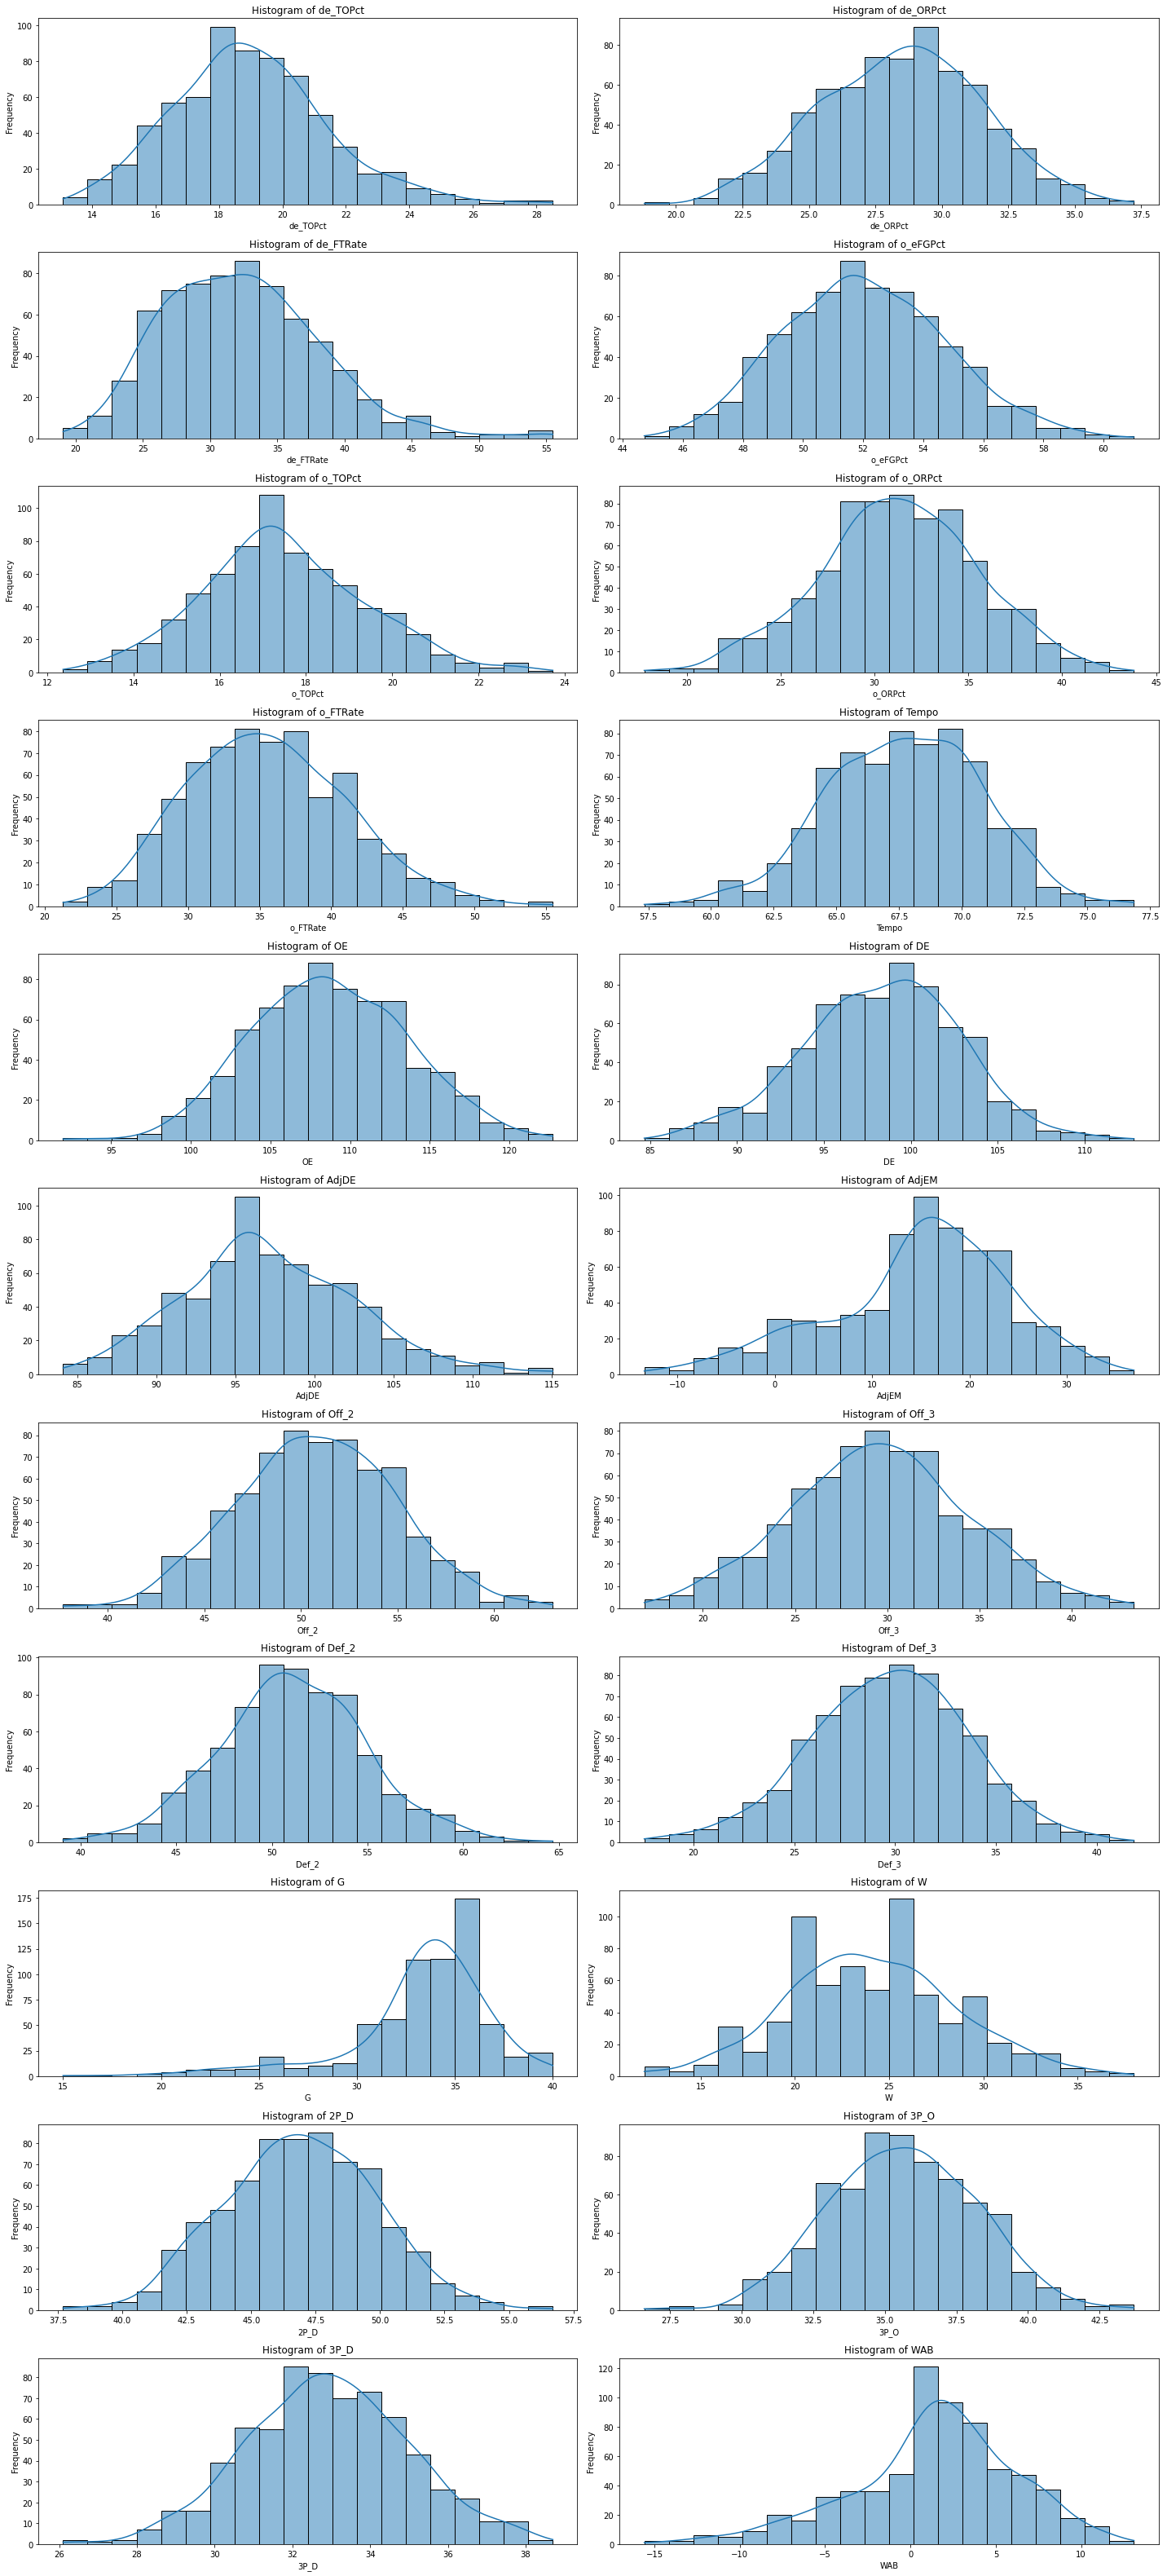

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
temp = data.drop(['SEED'], axis= 1)
temp = temp.drop(['Season'], axis=1)

# Selecting numerical columns for histograms
num_cols = temp.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_cols)

# Calculate the grid size needed for all subplots
num_rows = int(np.ceil(num_plots / 2))  # Here we are arranging the plots in 2 columns

# Set the overall figure size to fit all subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(20, 4 * num_rows))  # Adjust the figsize as needed

# Flatten the array of axes for easy iterating
axs = axs.ravel()

for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, bins=20, ax=axs[i])
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_ylabel('Frequency')

# If the number of plots is odd, remove the last subplot (which is empty)
if num_plots % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


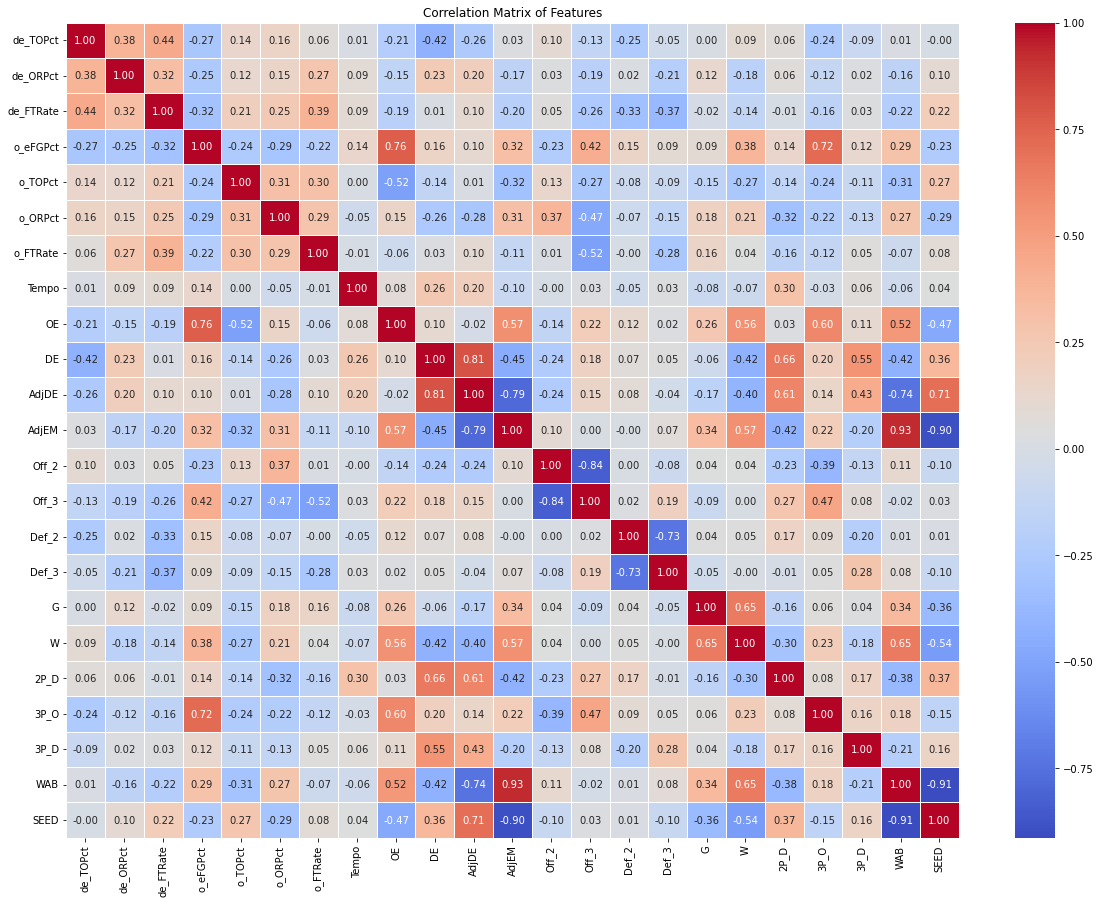

In [164]:
from sklearn.preprocessing import StandardScaler

# Extracting numerical features, excluding 'Season' as it's more of an identifier than a feature
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop(['Season'], axis=1)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Creating a new DataFrame for the scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Computing the correlation matrix
correlation_matrix = scaled_features_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 15))
# Here, annot=True to show the correlation values. Multiply by 100 and format to display as percentage.
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

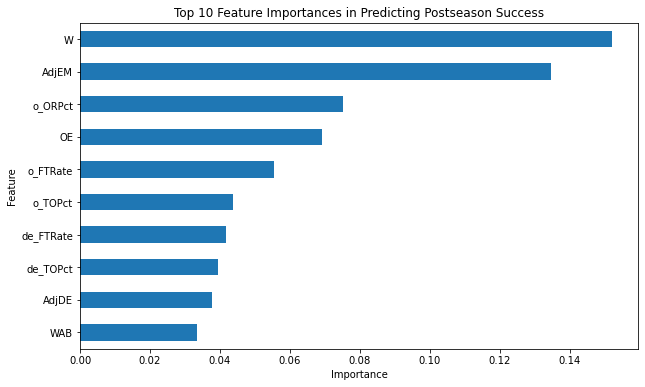

Training Accuracy: 1.0
Test Accuracy: 0.9803921568627451


In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

temp = data
temp['Success'] = temp['POSTSEASON'].apply(lambda x: 1 if x in ['2ND', 'Champions'] else 0)

features = ['de_TOPct', 'de_ORPct', 'de_FTRate', 'o_eFGPct',
            'o_TOPct', 'o_ORPct', 'o_FTRate', 'Tempo', 'OE', 'DE', 'AdjDE', 'AdjEM',
            'Off_2', 'Off_3', 'Def_2', 'Def_3', '2P_D', '3P_O',
            '3P_D', 'WAB', 'SEED', 'W']

# Preparing the features and target variable
X = temp[features]  # Using the same features as before
y = temp['Success']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting on the test set and calculating accuracy
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Getting feature importances and selecting the top 10
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
top_10_features = feature_importances.head(10)

# Plotting top 10 feature importances
plt.figure(figsize=(10, 6))
top_10_features.sort_values().plot(kind='barh')
plt.title('Top 10 Feature Importances in Predicting Postseason Success')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Predicting on the training set and calculating accuracy
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


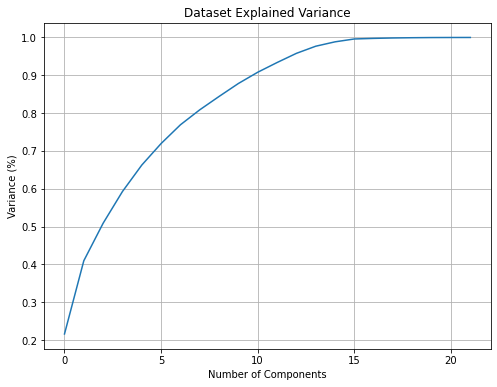

In [166]:
# Generating Scree Plot
# shows the cumulative variance explained as more components are included.
# helpful in determining how many components are needed to capture a certain proportion of the total variance, 
# which is a common criterion in PCA for reducing dimensionality while retaining most of the information.

# PCA - Standardize the data
features = num_cols
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)


pca = PCA().fit(x)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.grid(True)
plt.show()


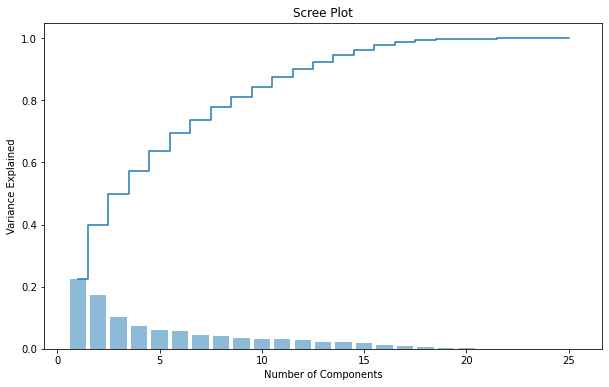

Component 1: 0.2234 or 22.34% of the total variance.
Component 2: 0.1740 or 17.40% of the total variance.
Component 3: 0.1019 or 10.19% of the total variance.
Component 4: 0.0744 or 7.44% of the total variance.
Component 5: 0.0620 or 6.20% of the total variance.
Component 6: 0.0575 or 5.75% of the total variance.
Component 7: 0.0446 or 4.46% of the total variance.
Component 8: 0.0396 or 3.96% of the total variance.
Component 9: 0.0346 or 3.46% of the total variance.
Component 10: 0.0322 or 3.22% of the total variance.
Component 11: 0.0301 or 3.01% of the total variance.
Component 12: 0.0268 or 2.68% of the total variance.
Component 13: 0.0227 or 2.27% of the total variance.
Component 14: 0.0215 or 2.15% of the total variance.
Component 15: 0.0177 or 1.77% of the total variance.
Component 16: 0.0134 or 1.34% of the total variance.
Component 17: 0.0095 or 0.95% of the total variance.
Component 18: 0.0068 or 0.68% of the total variance.
Component 19: 0.0038 or 0.38% of the total variance.

In [167]:
# Generate Scree Plot
# shows individual variance contributions by each component
#  useful for seeing the marginal gain in explained variance by adding each additional component, 
# helping identify components that add significant explanatory power

# Dropping non-numerical columns for PCA (not necessary in this dummy case)
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# Creating a Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

# Output the exact variance explained by each component
for i, variance in enumerate(explained_variance):
    print(f"Component {i+1}: {variance:.4f} or {variance*100:.2f}% of the total variance.")

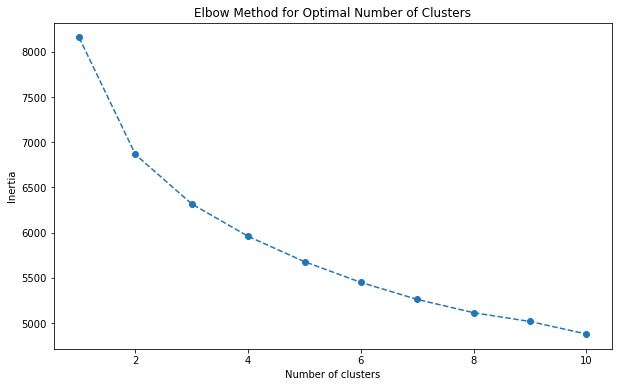

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

kmeans_data = data


# Selecting a subset of features for clustering
features = ['de_TOPct', 'de_ORPct', 'de_FTRate', 'o_eFGPct', 'o_TOPct', 'o_ORPct', 'o_FTRate', 'Tempo', '2P_D', '3P_O', '3P_D', 'WAB']
X = kmeans_data[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the Elbow Method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


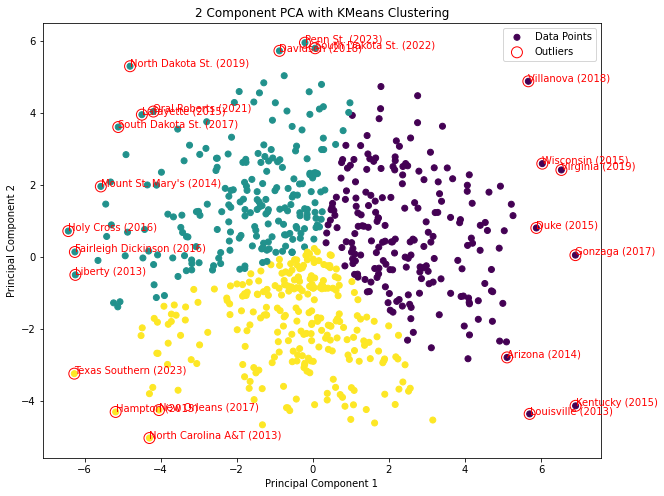

     Season             TeamName  CONF  SEED POSTSEASON
44     2023             Penn St.   B10  10.0        R32
57     2023       Texas Southern  SWAC  16.0        R68
119    2022     South Dakota St.   Sum  13.0        R64
179    2021         Oral Roberts   Sum  15.0        S16
243    2019     North Dakota St.   Sum  16.0        R64
266    2019             Virginia   ACC   1.0  Champions
285    2018             Davidson   A10  12.0        R64
333    2018            Villanova    BE   1.0  Champions
353    2017              Gonzaga   WCC   1.0        2ND
372    2017          New Orleans  Slnd  16.0        R68
389    2017     South Dakota St.   Sum  16.0        R64
422    2016  Fairleigh Dickinson   NEC  16.0        R68
429    2016           Holy Cross   Pat  16.0        R64
489    2015                 Duke   ACC   1.0  Champions
495    2015              Hampton  MEAC  16.0        R64
501    2015             Kentucky   SEC   1.0         F4
503    2015            Lafayette   Pat  16.0    

In [169]:
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame and it includes both 'TeamName' and 'Season' columns
numerical_data = kmeans_data.select_dtypes(include=['float64', 'int64'])
team_names = kmeans_data['TeamName'].values  # Extract team names
seasons = kmeans_data['Season'].values  # Extract seasons

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA for two components
pca_2 = PCA(n_components=2)
pca_data_2 = pca_2.fit_transform(scaled_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(pca_data_2)
cluster_labels = kmeans.labels_

# Add the cluster labels to the kmeans_data DataFrame
kmeans_data['Cluster'] = cluster_labels

# Calculate the distance of each point from the origin
distances = np.sqrt((pca_data_2**2).sum(axis=1))

# Calculate the Z-score of the distances
z_scores = (distances - distances.mean()) / distances.std()

# Consider points with a Z-score above 2 as outliers
outliers = np.where(z_scores > 2)[0]

# Creating a 2D scatter plot for the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_data_2[:, 0], pca_data_2[:, 1], c=cluster_labels, cmap='viridis', label='Data Points')  # Color by cluster label
plt.scatter(pca_data_2[outliers, 0], pca_data_2[outliers, 1], edgecolor='r', facecolor='none', s=120, label='Outliers')

# Labeling the outliers with 'TeamName (Season)'
for outlier in outliers:
    label = f"{team_names[outlier]} ({seasons[outlier]})"
    plt.annotate(label, (pca_data_2[outlier, 0], pca_data_2[outlier, 1]), color='red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA with KMeans Clustering')
plt.legend()

plt.show()

# Select and print only the specified columns for the outliers
outlier_rows = kmeans_data.iloc[outliers]
outlier_info = outlier_rows[['Season', 'TeamName', 'CONF', 'SEED', 'POSTSEASON']]
print(outlier_info)



In [170]:
# Order the DataFrame by the 'Cluster' column and then print the specified columns
ordered_all_teams_clusters = kmeans_data.sort_values(by=['Cluster'])[['Season', 'TeamName', 'CONF', 'SEED', 'POSTSEASON', 'Cluster']]
print(ordered_all_teams_clusters)


     Season                TeamName  CONF  SEED POSTSEASON  Cluster
0      2023                 Alabama   SEC   1.0        S16        0
334    2018                Virginia   ACC   1.0        R64        0
333    2018               Villanova    BE   1.0  Champions        0
329    2018              Texas Tech   B12   3.0         E8        0
325    2018               Tennessee   SEC   3.0        R32        0
315    2018                  Purdue   B10   2.0        S16        0
311    2018                Ohio St.   B10   5.0        R32        0
308    2018          North Carolina   ACC   2.0        R32        0
302    2018            Michigan St.   B10   3.0        R32        0
301    2018                Michigan   B10   3.0        2ND        0
298    2018          Loyola Chicago   MVC  11.0         F4        0
293    2018                  Kansas   B12   1.0         F4        0
291    2018                 Houston  Amer   6.0        R32        0
290    2018                 Gonzaga   WCC   4.0 

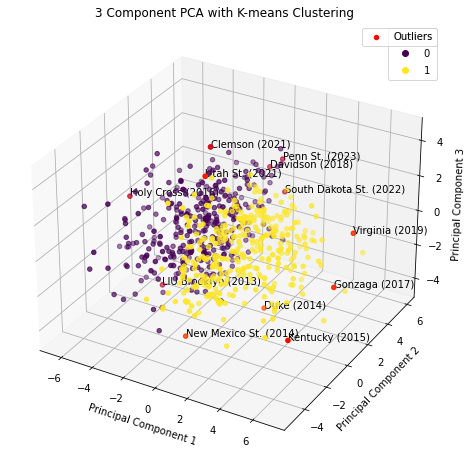

     Season          TeamName   de_TOPct   de_ORPct  de_FTRate   o_eFGPct  \
44     2023          Penn St.  13.087208  25.570776  25.518194  55.447655   
119    2022  South Dakota St.  15.819639  24.315353  21.266312  59.248705   
142    2021           Clemson  21.549554  26.937738  28.932806  49.962207   
195    2021          Utah St.  19.463593  21.393035  25.584334  49.790920   
266    2019          Virginia  17.372795  25.363985  26.265664  55.179961   
285    2018          Davidson  16.167276  23.375451  29.572837  57.390608   
353    2017           Gonzaga  17.093398  26.190476  26.927887  56.641824   
429    2016        Holy Cross  19.550800  29.599270  33.422320  47.924400   
501    2015          Kentucky  21.272100  31.821300  31.710800  51.511600   
558    2014              Duke  18.518600  31.315800  40.752700  53.811900   
581    2014    New Mexico St.  16.113000  32.980300  34.053800  53.186900   
638    2013      LIU Brooklyn  18.395800  33.555400  31.622700  54.374000   

In [171]:
# Dropping non-numerical columns for PCA
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying PCA for three components
pca_3 = PCA(n_components=3)
pca_data_3 = pca_3.fit_transform(scaled_data)

# Identifying outliers
std_devs = 2.7
outliers = np.where(np.any(np.abs(pca_data_3) > std_devs * np.std(pca_data_3, axis=0), axis=1))

# Apply K-means clustering
num_clusters = 2  # for example, you might want to choose a different number
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(pca_data_3)
labels = kmeans.labels_

# Creating a 3D plot for the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the first three PCA components with cluster coloring
scatter = ax.scatter(pca_data_3[:, 0], pca_data_3[:, 1], pca_data_3[:, 2], c=labels, cmap='viridis')

# Highlighting outliers
ax.scatter(pca_data_3[outliers, 0], pca_data_3[outliers, 1], pca_data_3[outliers, 2], color='r', label='Outliers')

# Annotate the outliers with 'TeamName' and 'Season'
for outlier in outliers[0]:
    team_name = data.iloc[outlier]['TeamName']
    season = data.iloc[outlier]['Season']
    label = f"{team_name} ({season})"
    ax.text(pca_data_3[outlier, 0], pca_data_3[outlier, 1], pca_data_3[outlier, 2], label, size=10, zorder=1, color='k')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)
plt.legend()

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3 Component PCA with K-means Clustering')

plt.show()

# Displaying the details of outliers
print(data.iloc[outliers])

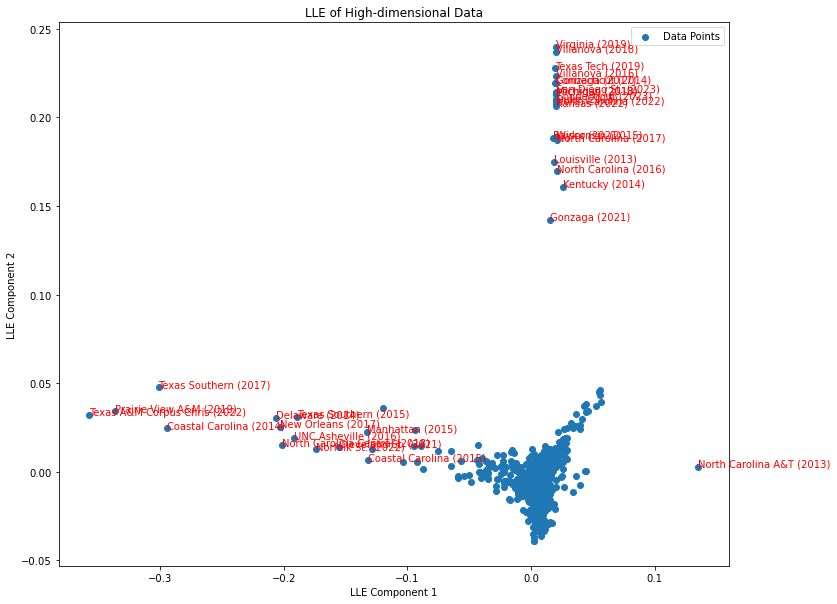

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler
import pandas as pd


numerical_data = data.select_dtypes(include=[np.number])
team_names = data['TeamName'].values  # Extract team names
seasons = data['Season'].values  # Extract seasons

# Standardizing the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Applying LLE
n_neighbors = 10  # This should be tuned according to your dataset
n_components = 2  # For 2D plot
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard')
lle_data = lle.fit_transform(scaled_data)

# Calculate the Euclidean distance from each point to the origin
distances = np.linalg.norm(lle_data, axis=1)
# Define outliers as those beyond a certain percentile - this can be adjusted
outlier_indices = distances > np.percentile(distances, 95)

# Plotting the LLE result
plt.figure(figsize=(12, 10))
plt.scatter(lle_data[:, 0], lle_data[:, 1], label='Data Points')
plt.title('LLE of High-dimensional Data')

# Label outliers with their corresponding team names and seasons
for i in np.where(outlier_indices)[0]:
    label = f"{team_names[i]} ({seasons[i]})"
    plt.annotate(label, (lle_data[i, 0], lle_data[i, 1]), color='red')

plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.legend()
plt.show()


In [173]:
# Assuming 'data' is your DataFrame and 'Seed' is the column of interest
seed_counts = data['SEED'].value_counts()

count = data['POSTSEASON'].value_counts()


print(count)

# Display the count for each seed value
print(seed_counts)

R64          320
R32          160
S16           80
E8            40
R68           40
F4            20
Champions     10
2ND           10
Name: POSTSEASON, dtype: int64
16.0    60
11.0    58
12.0    42
3.0     41
13.0    41
1.0     40
2.0     40
8.0     40
10.0    40
15.0    40
6.0     40
5.0     40
14.0    40
7.0     40
9.0     39
4.0     39
Name: SEED, dtype: int64


In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Filter the dataset for Purdue and seasons up to and including 2022
purdue_data = data[(data['TeamName'] == 'Purdue') & (data['Season'] <= 2022)]

# Define the features and target variable, excluding non-numeric columns and the target
X = purdue_data.drop(['TeamName', 'POSTSEASON', 'CONF', 'Season'], axis=1)
y = purdue_data['POSTSEASON']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Assuming we have the 2023 data for Purdue in the dataset
purdue_2023_data = data[(data['TeamName'] == 'Purdue') & (data['Season'] == 2023)].drop(['TeamName', 'POSTSEASON', 'CONF', 'Season'], axis=1)

if not purdue_2023_data.empty:
    # Predict the 'POSTSEASON' outcome for Purdue for 2023
    purdue_2023_pred = rf_clf.predict(purdue_2023_data)
    # Decode the prediction to get the 'POSTSEASON' outcome
    purdue_2023_outcome = label_encoder.inverse_transform(purdue_2023_pred)
    print(f"Purdue's predicted POSTSEASON outcome for 2023: {purdue_2023_outcome[0]}")
else:
    print("Data for Purdue for the 2023 season is not available for prediction.")


Accuracy: 0.3333333333333333
Purdue's predicted POSTSEASON outcome for 2023: S16
